## Conjunto de Dados do Wine

_____________________________________________

Disciplina: Aprendizado de Máquina

* Istefferson Oliveira da Silva
_____________________________________________

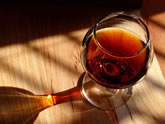

Informações do conjunto de dados:

Esses dados são resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.

Eu acho que o conjunto de dados inicial tinha cerca de 30 variáveis, mas por algum motivo eu só tenho a versão de 13 dimensões. Eu tinha uma lista de cerca de 30 variáveis, mas a.) eu a perdi, e b.), eu não saberia quais 13 variáveis ​​estão incluídas no conjunto.

Os atributos são (dotados por Riccardo Leardi, riclea '@' anchem.unige.it )
* 1) Alcohol
* 2) Malic acid
* 3) Ash
* 4) Alcalinity of ash
* 5) Magnesium
* 6) Total phenols
* 7) Flavanoids
* 8) Nonflavanoid phenols
* 9) Proanthocyanins
* 10)Color intensity
* 11)Hue
* 12)OD280/OD315 of diluted wines
* 13)Proline


Em um contexto de classificação, este é um problema bem colocado com estruturas de classe "bem comportadas". Um bom conjunto de dados para o primeiro teste de um novo classificador, mas não muito desafiador.


**Informações do atributo:**

Todos os atributos são contínuos

Não há estatísticas disponíveis, mas sugerimos padronizar variáveis ​​para determinados usos (por exemplo, para nós com classificadores que NÃO são invariantes de escala)

NOTA: 1º atributo é identificador de classe (1-3)


http://archive.ics.uci.edu/ml/datasets/Wine

## Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

## Visualizando os Dados

In [2]:
df = pd.read_csv('wine.data', encoding='ISO-8859-1', 
                 names=['Identificador',
                        'Alcohol',
                        'Malic acid',
                        'Ash',
                        'Alcalinity of ash',  
                        'Magnesium',
                        'Total phenols',
                        'Flavanoids',
                        'Nonflavanoid phenols',
                        'Proanthocyanins',
                        'Color intensity',
                        'Hue',
                        'Diluted wines',
                        'Proline'])

In [3]:
df

,Identificador,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.describe().round(2)

,Identificador,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [7]:
X = np.array(df)
X

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
X = np.array(df.drop('Identificador',1))
X

C:\Users\DELL\AppData\Local\Temp/ipykernel_14052/3887505697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop('Identificador',1))


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
y = np.array(df['Identificador'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

## TREINANDO O MODELO ARVORE DE DECISÃO

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, random_state=6)

## TREINANDO O MODELO ARVORE DE DECISÃO

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree_wine = DecisionTreeClassifier(criterion='entropy', random_state=5)

In [14]:
tree_wine.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=5)

## Ganho de Informação de cada atributo

In [15]:
df.columns

Index(['Identificador', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'Diluted wines',
       'Proline'],
      dtype='object')

In [16]:
tree_wine.feature_importances_*100

array([ 3.11366757,  0.        ,  0.        ,  0.        ,  4.3536618 ,
        0.        ,  0.        ,  0.        ,  0.        ,  7.68439665,
        0.        , 51.95936298, 32.88891101])

In [17]:
print(f'Alcohol = {tree_wine.feature_importances_[0].round(2)}')

print(f'Malic acid = {tree_wine.feature_importances_[1].round(2)}')

print(f'Ash = {tree_wine.feature_importances_[2].round(2)}')

print(f'Alcalinity of ash = {tree_wine.feature_importances_[3].round(2)}')

print(f'Magnesium = {tree_wine.feature_importances_[4].round(2)}')

print(f'Total phenols = {tree_wine.feature_importances_[5].round(2)}')

print(f'Flavanoids = {tree_wine.feature_importances_[6].round(2)}')

print(f'Nonflavanoid phenols = {tree_wine.feature_importances_[7].round(2)}')

print(f'Proanthocyanins = {tree_wine.feature_importances_[8].round(2)}')

print(f'Color intensity = {tree_wine.feature_importances_[9].round(2)}')

print(f'Hue = {tree_wine.feature_importances_[10].round(2)}')

print(f'Diluted wines = {tree_wine.feature_importances_[11].round(2)}')

Alcohol = 0.03
Malic acid = 0.0
Ash = 0.0
Alcalinity of ash = 0.0
Magnesium = 0.04
Total phenols = 0.0
Flavanoids = 0.0
Nonflavanoid phenols = 0.0
Proanthocyanins = 0.0
Color intensity = 0.08
Hue = 0.0
Diluted wines = 0.52


## Gerando o Gráfico da Arvore de Decisão

In [18]:
str(tree_wine.classes_)

'[1 2 3]'

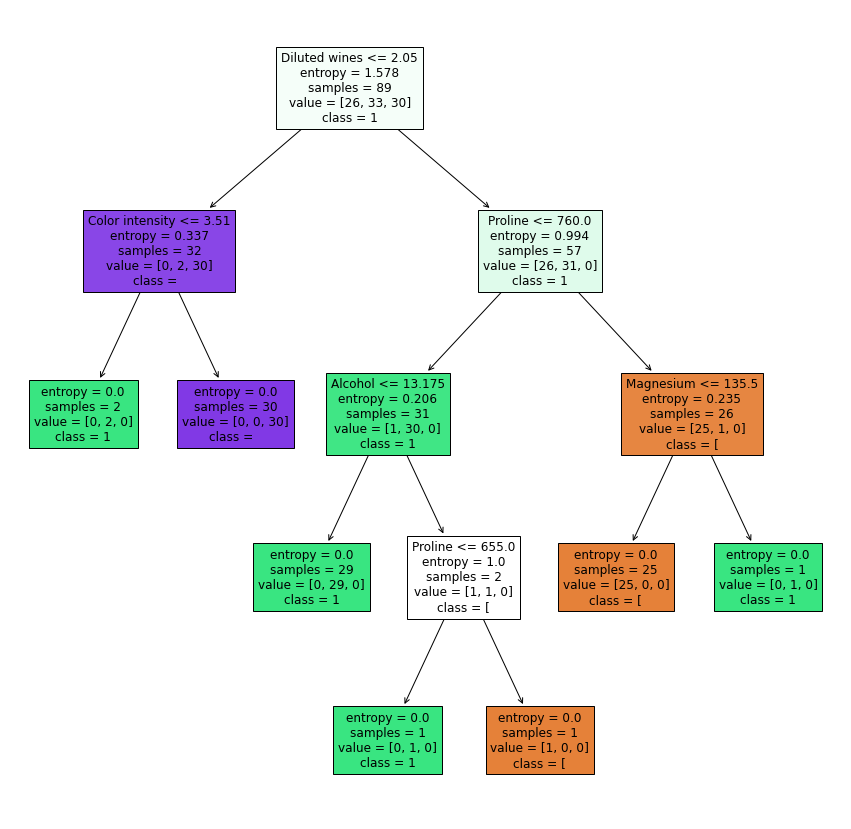

In [19]:
from dataclasses import field
from sklearn import tree
previsores = ['Alcohol',
              'Malic acid',
              'Ash',
              'Alcalinity of ash',  
              'Magnesium',
              'Total phenols',
              'Flavanoids',
              'Nonflavanoid phenols',
              'Proanthocyanins',
              'Color intensity',
              'Hue',
              'Diluted wines',
              'Proline']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
tree.plot_tree(tree_wine, feature_names=previsores, class_names=str(tree_wine.classes_), filled=True);

## TESTANDO O MODELO

Testando um único valor:

In [20]:
tree_wine.predict([[13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185]])

array([1], dtype=int64)

verificando os dados de teste:

In [21]:
TESTE = pd.DataFrame(data=X_test)
TESTE.columns = ['Alcohol',
                'Malic acid',
                'Ash',
                'Alcalinity of ash',  
                'Magnesium',
                'Total phenols',
                'Flavanoids',
                'Nonflavanoid phenols',
                'Proanthocyanins',
                'Color intensity',
                'Hue',
                'Diluted wines',
                'Proline']
TESTE.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
1,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0
2,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0
3,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
4,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0


In [22]:
TESTE['real_target'] = Y_test
TESTE.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline,real_target
0,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,1
1,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,2
2,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0,2
3,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,2
4,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,1


In [23]:
TESTE['predict_target'] = tree_wine.predict(X_test)

## ITENS QUE A PREDIÇÃO NÃO FUNCIONOU CORRETAENTE

In [24]:
TESTE[TESTE['real_target'] != TESTE['predict_target']]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline,real_target,predict_target
24,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,2,3
28,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0,3,1
31,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0,3,2
32,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0,3,2
39,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0,3,2
74,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515.0,2,3
77,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,3,2
82,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,2,1


## Acurácia do Modelo

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [26]:
acuracia_wine = accuracy_score(Y_test, tree_wine.predict(X_test))
acuracia_wine

0.9101123595505618

## Matrix Confusão

In [27]:
conf_matrix_wine = confusion_matrix(Y_test, tree_wine.predict(X_test))
conf_matrix_wine

array([[33,  0,  0],
       [ 1, 35,  2],
       [ 1,  4, 13]], dtype=int64)

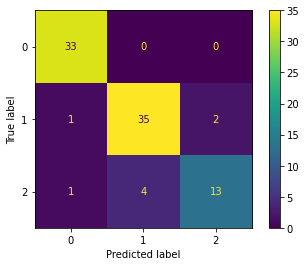

In [28]:

ConfusionMatrixDisplay(conf_matrix_wine).plot()

plt.show()

# Report do Resultado Final

In [29]:
report_wine = classification_report(Y_test, tree_wine.predict(X_test), target_names=["1", "2", "3"])

In [30]:
print(report_wine)

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        33
           2       0.90      0.92      0.91        38
           3       0.87      0.72      0.79        18

    accuracy                           0.91        89
   macro avg       0.90      0.88      0.89        89
weighted avg       0.91      0.91      0.91        89



## Conclusão Modelo Arvore de Decisão
O modelo previu:

* 100% das itens com a localidade 1, com 94% de precisão;
* 92% das itens com a localidade 2, com 90% de precisão;
* 72% das itens com a localidade 3, com 87% de precisão.

Acurácia do Modelo: 91%

_________________________________________________________

## TREINANDO O MODELO RANDOM TREE

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
random_tree_wine = RandomForestClassifier(n_estimators=8,criterion='entropy', random_state=5)

In [33]:
random_tree_wine.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=5)

## Ganho de Informação de cada atributo

In [34]:
df.columns

Index(['Identificador', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'Diluted wines',
       'Proline'],
      dtype='object')

In [35]:
random_tree_wine.feature_importances_*100

array([ 4.48151602,  6.78564151,  3.44006255,  2.65858571,  0.        ,
        0.6899068 , 27.09781794,  5.04785725,  0.56032149, 11.22089287,
        5.66776624, 14.36014579, 17.98948583])

In [36]:
print(f'Alcohol = {random_tree_wine.feature_importances_[0].round(2)}')

print(f'Malic acid = {random_tree_wine.feature_importances_[1].round(2)}')

print(f'Ash = {random_tree_wine.feature_importances_[2].round(2)}')

print(f'Alcalinity of ash = {random_tree_wine.feature_importances_[3].round(2)}')

print(f'Magnesium = {random_tree_wine.feature_importances_[4].round(2)}')

print(f'Total phenols = {random_tree_wine.feature_importances_[5].round(2)}')

print(f'Flavanoids = {random_tree_wine.feature_importances_[6].round(2)}')

print(f'Nonflavanoid phenols = {random_tree_wine.feature_importances_[7].round(2)}')

print(f'Proanthocyanins = {random_tree_wine.feature_importances_[8].round(2)}')

print(f'Color intensity = {random_tree_wine.feature_importances_[9].round(2)}')

print(f'Hue = {random_tree_wine.feature_importances_[10].round(2)}')

print(f'Diluted wines = {random_tree_wine.feature_importances_[11].round(2)}')

Alcohol = 0.04
Malic acid = 0.07
Ash = 0.03
Alcalinity of ash = 0.03
Magnesium = 0.0
Total phenols = 0.01
Flavanoids = 0.27
Nonflavanoid phenols = 0.05
Proanthocyanins = 0.01
Color intensity = 0.11
Hue = 0.06
Diluted wines = 0.14


## TESTANDO O MODELO

Testando um único valor:

In [37]:
random_tree_wine.predict([[13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185]])

array([1], dtype=int64)

verificando os dados de teste:

In [38]:
TESTE = pd.DataFrame(data=X_test)
TESTE.columns = ['Alcohol',
                'Malic acid',
                'Ash',
                'Alcalinity of ash',  
                'Magnesium',
                'Total phenols',
                'Flavanoids',
                'Nonflavanoid phenols',
                'Proanthocyanins',
                'Color intensity',
                'Hue',
                'Diluted wines',
                'Proline']
TESTE.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
1,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0
2,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0
3,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
4,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0


In [39]:
TESTE['real_target'] = Y_test
TESTE.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline,real_target
0,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,1
1,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,2
2,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0,2
3,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,2
4,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,1


In [40]:
TESTE['predict_target'] = random_tree_wine.predict(X_test)

## ITENS QUE A PREDIÇÃO NÃO FUNCIONOU CORRETAENTE

In [41]:
TESTE[TESTE['real_target'] != TESTE['predict_target']]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline,real_target,predict_target
31,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.5,0.55,4.35,0.89,2.06,520.0,3,2


## Acurácia do Modelo

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [43]:
acuracia_wine = accuracy_score(Y_test, random_tree_wine.predict(X_test))
acuracia_wine

0.9887640449438202

## Matrix Confusão

In [44]:
conf_matrix_wine = confusion_matrix(Y_test, random_tree_wine.predict(X_test))
conf_matrix_wine

array([[33,  0,  0],
       [ 0, 38,  0],
       [ 0,  1, 17]], dtype=int64)

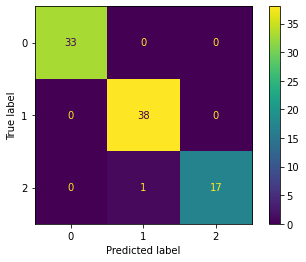

In [45]:

ConfusionMatrixDisplay(conf_matrix_wine).plot()

plt.show()

# Report do Resultado Final

In [46]:
report_wine = classification_report(Y_test, random_tree_wine.predict(X_test), target_names=["1", "2", "3"])

In [47]:
print(report_wine)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       0.97      1.00      0.99        38
           3       1.00      0.94      0.97        18

    accuracy                           0.99        89
   macro avg       0.99      0.98      0.99        89
weighted avg       0.99      0.99      0.99        89



## Conclusão Modelo Random Tree
O modelo previu:

* 100% das itens com a localidade 1, com 100% de precisão;
* 100% das itens com a localidade 2, com 97% de precisão;
* 94% das itens com a localidade 3, com 100% de precisão.

Acurácia do Modelo: 99%

__________________________________________________